The necessary python libraries are imported here-

- **numpy** is used to perform basic operations.

- **pyplot** from matplotlib is used to visualize the results.

- **pandas** is used to read the dataset.

- **tensorflow** is a deep learning framework

- **keras** is a deep learning framework

In [ ]:
# tensorflow is developed by google
# tensorflow langauge is always based on tensors
# list === array  === tensors (vector represenation)
# writing only tensorflow code is littile tricky
# so we use keras as backend of tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.15.0


**Here we are loading the fashion_mnist dataset from keras**

In [ ]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [4]:
mnist = keras.datasets.fashion_mnist
#The dataset is downloaded in TFModuleWrapper.

In [5]:
mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
type(mnist)

module

- Now we load the data into real variables using load_data().

- It return 2 tuples. The first tupes has the training data and the second tuple has the test data.

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The data consist of images which means it has pixel values

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

By using shape we can see that it has 60,000 images for training and each image is of size 28x28 in X_train and a corresponding label for each image in y_train.

In [7]:
X_train.shape, y_train.shape
# 60k Images
# each image shape  is 28x28=784 pixel values

((60000, 28, 28), (60000,))

In [8]:
len(X_train[1]) # each list has 28 values

28

In [9]:
len(X_train[0])

# 28 lists are there
# in each list 28 values are there

28

In [10]:
len(X_train[1][0]),len(X_train[1])

(28, 28)

In [11]:
X_train[0].shape    # First image
X_train[1]          # second image

# In image we have 784 pixels are there
# 28x28
# RGB picture : color picture
# Gray        : not a color picture

# RGB values ranges between  0 to 255
# Rainbow :  7
#  2^7: 256
# 0= black
# 255= white
# Rainbow

# subject: Digital Imgae processing  OpenCV

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

np.max() gives the maximum value. Hence the maximum value in X_train is 255. We can even see the minimum value using np.min(X_train). The minimum value will be 0.

In [12]:
type(X_train)

# numpy array also is a form of creating an array
# like list

numpy.ndarray

In [13]:
list1=[1,2,3]
max(list1)

3

In [14]:
#max(X_train)

In [15]:
np.max(X_train)

255

In [16]:
np.min(X_train)

0

As we know the images are divided into 10 categories. The 10 categories are encoded using a numerical value as show below.

In [17]:
y_train

# 0 to 9

#X_train[0]    has output of  y_train[0]=9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

These are all the class name in their proper order. top is encoded as 0, trouser is encoded as 1 and so on.

class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [18]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

### Data exploration

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
#The testing data set containes 10000 images of size 28x28.
X_test.shape

(10000, 28, 28)

- Here we have plotted the second image of our training set i.e. the image at index 1.

- The **plt.figure()** function in pyplot module of matplotlib library is used to create a new figure.

- The **plt.imshow()** function in pyplot module of matplotlib library is used to display data as an image.

- **plt.colorbar()** displays the colour bar besides the image. You can see that the values are between 0 and 255.

In [21]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

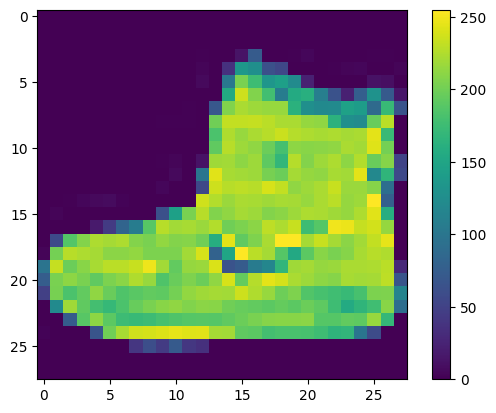

In [22]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

# yellow =250

As you can see the image is a top and the value at index 0 of y_train also corresponds to the class name top.

In [23]:
#x_train[0]  =========== y_train[0]=9
class_names[y_train[0]]

'ankle boot'

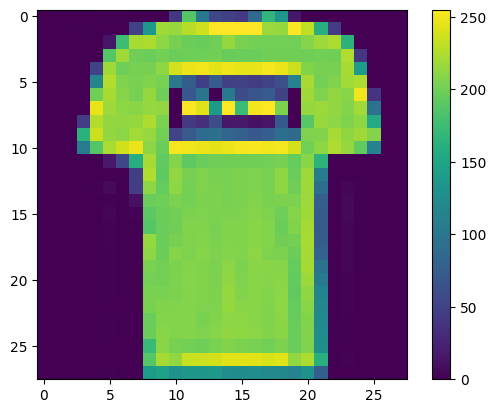

In [24]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.show()

In [25]:
y_train[1]   # index  =1

class_names[y_train[1]]  # class_names[0]

# in y_train we have indexes  from 0 to 9
# class names is alist of items

'top'

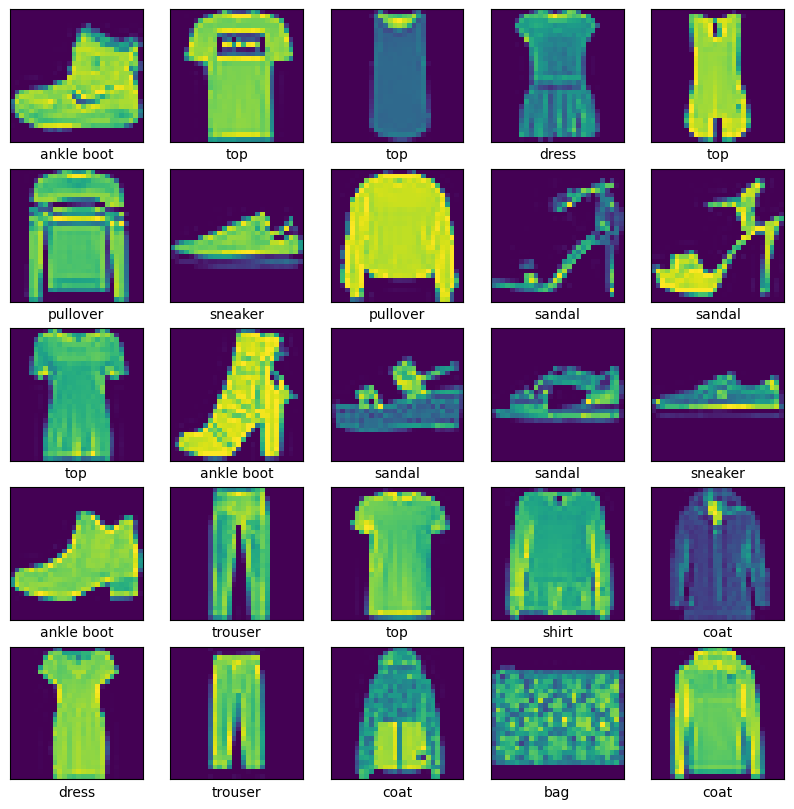

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):  # 25images
    plt.subplot(5,5,i+1) # 25 plots  i=2   5,5,2
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Normalization**

range between 0 to 1

Neural Network model doesn't take value greater than 1.

So we need to bring all the values between 0 and 1.

To do this we will divide all the values in the training and testing dataset by 255 as the greatest value in our dataset is 255.

In [27]:
X_train = X_train/255.0
X_test = X_test/255.0

Now we can see that all the values are between 0 and 1.

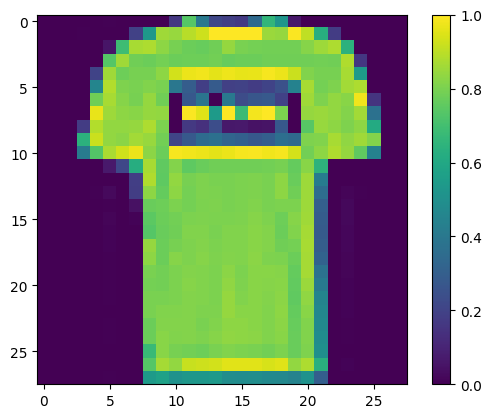

In [28]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

- We read the data

- we understand the values

- we understand the shape of the data

- we plot the data

- we understand the lables of the data

- we normlaize the data

- here train and test data both are available

- here X(input data)  , y (target data) already provided

**Build the model with TF 2.0**

We will import the necessary layers to build the model. The Neural Network is constructed from 3 type of layers:

**Input layer** — initial data for the neural network.

**Hidden layers** — intermediate layer between input and output layer and place
where all the computation is done.

**Output layer** — produce the result for given inputs

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

**Flatten()**

- is used as the input layer to convert the data into a 1-dimensional array for input it to the next layer.


- Our image 2D image will be converted to a single 1D column.
input_shape = (28,28) because the size of our input image is 28x28.

**Dense()**

    - layer is the regular deeply connected neural network layer.

    - It is most common and frequently used layer.
    
    - We have a dense layer with 128 neurons with activation function relu.
    
    - The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

<img decoding="async" loading="lazy" width="357" height="278" src="https://kgptalkie.com/wp-content/uploads/2020/08/relu.png" alt="" class="wp-image-3518" srcset="https://kgptalkie.com/wp-content/uploads/2020/08/relu.png 357w, https://kgptalkie.com/wp-content/uploads/2020/08/relu-300x234.png 300w" sizes="(max-width: 357px) 100vw, 357px">

- The **output layer** is a dense layer with 10 neurons because we have 10 classes.

- The activation function used is **softmax**.

- Softmax converts a real vector to a vector of categorical probabilities.

- The elements of the output vector are in range (0, 1) and sum to 1.

- Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

In [30]:
X_train.shape[1:]

(28, 28)

## Model Development

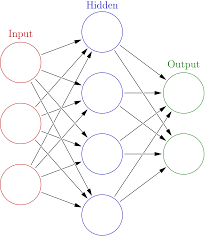

In [31]:
model = Sequential()
# input layer   starts flatten 28x28 === 1-D
model.add(Flatten(input_shape = (28, 28)))   # 28x28=784 input



# one Hidden layer
# how many neurons wants to use : 128
# which activation function wants to use : 'relu'
# bcz it avoids vanish gradients problem

model.add(Dense(128, activation = 'relu'))  # 128   :  784x128+ 128*(1bias)

# Output layer
# how many classes are there =10
# how many neuorns : 10
# activation: softmax
model.add(Dense(10, activation = 'softmax'))  # 128 is attached with 10 neurons= 128x10=1280 +10*(1bias)


## Model summary

In [32]:
model.summary()
# how many weights for input layer = 28x28 ==== > 784 ==== > weights
# hidden layer weights= 128

# total weights till inputlayer + hidden layer= 784*128=100352+ 128= 100480
# hidden layer + outpulayer= 128*10=1280+10 bais= 1290

# Total weights= 100480+1290

# servers drinks so much water

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Mode Compile

**Model compilation**

**Loss Function:** A loss function is used to optimize the parameter values in a neural network model. Loss functions map a set of parameter values for the network onto a scalar value that indicates how well those parameter accomplish the task the network is intended to do.

**Optimizer:** Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

**Metrics:** A metric is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model.

Here we are compiling the model and fitting it to the training data. We will use 10 epochs to train the model. An epoch is an iteration over the entire data provided.

**Log Loss (Binary Cross-Entropy Loss):** A loss function that represents how much the predicted probabilities deviate from the true ones.

It is used in binary cases.

**Cross-Entropy Loss:** A generalized form of the log loss, which is used for multi-class classification problems.

<img id="dimg_405" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4ftm3TWhDf8CX99Liu-i1qHPO-S0OBwPByw&amp;s" class="YQ4gaf" height="172" style="object-position:center" width="293" alt="haltakov.eth 🧱🔨 on X: &quot;Machine Learning ..." data-csiid="59" data-atf="4" data-ilt="1708622077104" data-deferred="3">

In [33]:
from re import VERBOSE
# Now we know how many weights need to update
# to find the weights we have optimzers
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Mode fit

In [34]:
model.fit(X_train,
          y_train,
          epochs = 10,
          batch_size=64,
          verbose=True)

## By default verbose =True ============ > It will display the information
##            verbose=False ============ > It will not display the information
# epoch = Forward pass + Backward pass
# Forward pass assign weights randomly at intial state
# Backward pass update the weight by ADAM
# Back prpogation


# loss is not reducing
# weights are same ====== vansihing gradients problem

# loss is reducing
# weights are same ==== we are good

# here we are passing batch size=64
# 60000/64= 938 btaches



# 60000k samples are divided into batches
# default batch size=32
# 60000/32=1875 batches   each batch has 32 samples


Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.5181 - accuracy: 0.8208
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3829 - accuracy: 0.8630
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3461 - accuracy: 0.8743
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3206 - accuracy: 0.8836
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3052 - accuracy: 0.8883
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2914 - accuracy: 0.8926
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2779 - accuracy: 0.8982
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2651 - accuracy: 0.9021
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2557 - accuracy: 0.9056
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2461 - accuracy: 0.9095

**Hyper parameters**

- Number of Hidden layer

- Number of Neurons

- Optimizer

- loss

- accuracy

- Epochs

- Batch size

- learning rate


## Model Evaluation

Now we will evaluate the accuracy using the test data. We have got an accuracy of 87.82%.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.8876
0.8876000046730042


## Model Predictions

Now we are going to do predictions using sklearn and see the accuracy. For that we will import accuracy_score from sklearn.

In [ ]:
from sklearn.metrics import accuracy_score

**predict_classes** generates class predictions for the input samples.

Here we are giving X_test containing 10000 images as the input.

 We are even predicting the accuracy.

 In multilabel classification, accuracy_score computes subset accuracy:

 the set of labels predicted for a sample must exactly match the corresponding set of labels in y_test.

In [36]:
y_pred = model.predict(X_test)
y_pred
#accuracy_score(y_test, y_pred)

# how many probabilities will get for one image = 10

# In ML will get direct labels as predictions
# but always remember before getting the classes , we actually get some probability values
# for one test sample will get probability values that is equal to number of classes
# in this problem we have 10 classes
# one test sample will get 10 probabilities
# which is the higest probability , that will be the answer

313/313 [==============================] - 1s 2ms/step


array([[3.6421750e-07, 8.4304908e-08, 1.2469633e-07, ..., 5.0180429e-03,
        6.5997011e-07, 9.8424685e-01],
       [1.1249082e-05, 1.5963834e-11, 9.9487054e-01, ..., 2.8321015e-15,
        4.2949591e-09, 8.5014108e-14],
       [1.3733759e-08, 9.9999994e-01, 7.0525530e-12, ..., 3.3752905e-20,
        3.3480094e-12, 1.0548861e-14],
       ...,
       [8.9459885e-05, 9.8593543e-11, 5.1563427e-05, ..., 2.7585252e-09,
        9.9971473e-01, 1.3601699e-09],
       [4.3912736e-09, 9.9999434e-01, 4.0503081e-10, ..., 1.8074492e-16,
        3.1057992e-10, 5.8636498e-11],
       [1.1598658e-05, 2.3615415e-08, 1.2703646e-05, ..., 3.2724382e-04,
        6.0425409e-05, 1.0841404e-06]], dtype=float32)

In [ ]:
len(X_test)

10000

In [ ]:
y_pred[0]  #  how many predictons =  number test cases

array([1.1912752e-15, 1.3815152e-20, 6.4996951e-16, 8.8415409e-22,
       7.3651484e-16, 3.4553342e-09, 3.2784599e-20, 5.4112365e-06,
       4.1912851e-17, 9.9999458e-01], dtype=float32)

In [ ]:
np.sum(y_pred[0]) # Summation of all probabilities =1

1.0

In [ ]:
max=np.max(y_pred[0])
max

0.9999946

In [ ]:
index=list(y_pred[0]).index(max)
index

9

**np.max  vs np.argmax**

- np.max  will give maximum value in array

- np.argmax will give index of the maximum value

- using these index we can get the class names

In [ ]:
np.max(y_pred[0]),np.argmax(y_pred[0])

(0.9999946, 9)

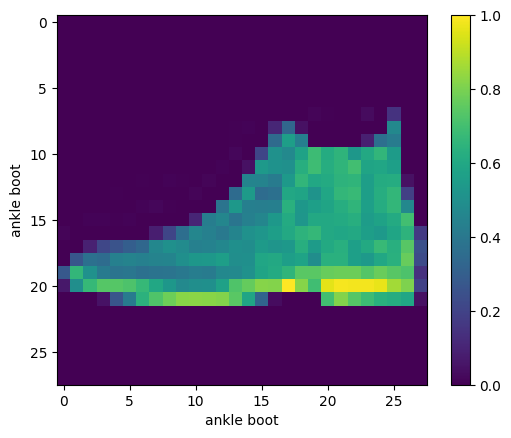

In [37]:
y_pred[0]  # First prediction
max_prob=np.max(y_pred[0]) # Predicton wil give probabilites of all classes
index=np.argmax(y_pred[0]) # Index of maximum probability
prediction_class=class_names[index] # Using index we are getting class name
Ground_Truth_class= class_names[y_test[0]] # We also passing orfinal test input value and getting the class

plt.figure()
plt.imshow(X_test[0])
plt.xlabel(Ground_Truth_class)
plt.ylabel(prediction_class)
plt.colorbar()

In [38]:
max_prob=[np.max(i)  for i in y_pred]
index=[np.argmax(i) for i in y_pred]
prediction_class=[class_names[i] for i in index]
Ground_Truth_class=[class_names[i] for i in y_test]

d1=pd.DataFrame(zip(max_prob,index,prediction_class,Ground_Truth_class),
             columns=['Max_proba','Index','Prediction_class','Ground_Truth_class'])
con=d1['Prediction_class']==d1['Ground_Truth_class']
d1['output']=np.where(con,1,0)
accuracy=d1['output'].sum()/len(d1['output'])
accuracy

0.8827

In [39]:
d1

,Max_proba,Index,Prediction_class,Ground_Truth_class,output
0,0.984247,9,ankle boot,ankle boot,1
1,0.994871,2,pullover,pullover,1
2,1.000000,1,trouser,trouser,1
3,0.999998,1,trouser,trouser,1
4,0.854889,6,shirt,shirt,1
...,...,...,...,...,...
9995,0.999993,9,ankle boot,ankle boot,1
9996,0.999979,1,trouser,trouser,1
9997,0.999715,8,bag,bag,1
9998,0.999994,1,trouser,trouser,1


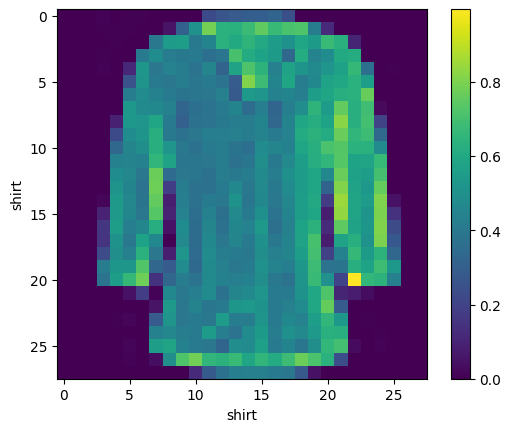

In [40]:
y_pred[4]  # First prediction
max_prob=np.max(y_pred[4]) # Predicton wil give probabilites of all classes
index=np.argmax(y_pred[4]) # Index of maximum probability
prediction_class=class_names[index] # Using index we are getting class name
Ground_Truth_class= class_names[y_test[4]] # We also passing orfinal test input value and getting the class

plt.figure()
plt.imshow(X_test[4])
plt.xlabel(Ground_Truth_class)
plt.ylabel(prediction_class)
plt.colorbar()

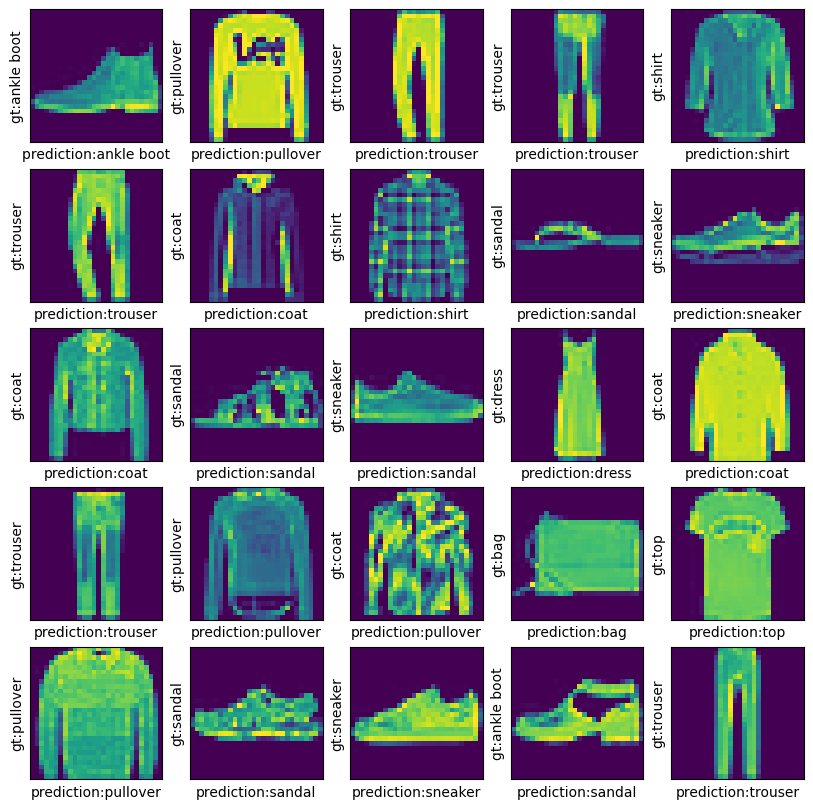

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(f'prediction:{class_names[np.argmax(y_pred[i])]}')
    plt.ylabel(f'gt:{class_names[y_test[i]]}')
plt.show()

- Model creation

           - sequential
           - add
           - dense


- Model compile

          - optimizer

          - loss (cross entropy)

          - metrics (accuracy)

- Model fit

          - X_train

          - y_train

          - epochs

          - batch size

- Model evaluation

          - On the test data what are the metrics and loss that

          - X_test

          - y_test

- Model predictions

          - X_test

          - probability values it is providing

**Fine tuning**

- By increasing Hidden layers

- By increasing Neurons

- By chnaging optimizer

- By changing Epochs

- By adding drop out technqiue

## Save the model

In [49]:
len(model.weights[3].numpy())

10

In [50]:

model.save_weights('./checkpoints/my_checkpoint')
# created a directory name checkpoints
# in side I created one more folder name my_checkpoint
# I saved my model weights here

In [52]:
# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')


In [54]:
# apply the prediction
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 2s 5ms/step


array([[3.6421750e-07, 8.4304908e-08, 1.2469633e-07, ..., 5.0180429e-03,
        6.5997011e-07, 9.8424685e-01],
       [1.1249082e-05, 1.5963834e-11, 9.9487054e-01, ..., 2.8321015e-15,
        4.2949591e-09, 8.5014108e-14],
       [1.3733759e-08, 9.9999994e-01, 7.0525530e-12, ..., 3.3752905e-20,
        3.3480094e-12, 1.0548861e-14],
       ...,
       [8.9459885e-05, 9.8593543e-11, 5.1563427e-05, ..., 2.7585252e-09,
        9.9971473e-01, 1.3601699e-09],
       [4.3912736e-09, 9.9999434e-01, 4.0503081e-10, ..., 1.8074492e-16,
        3.1057992e-10, 5.8636498e-11],
       [1.1598658e-05, 2.3615415e-08, 1.2703646e-05, ..., 3.2724382e-04,
        6.0425409e-05, 1.0841404e-06]], dtype=float32)